# Next Word Prediction Using  LSTM's

In this example we will work on the following text 

**Project Gutenberg - Sherlock Holmes**


Data Download link 

https://statso.io/next-word-prediction-case-study/


#### Reference Text  from NVIDIA - Learning Deep Learning 

https://www.nvidia.com/en-in/training/books/


#### Primary Code reference 
https://medium.com/@ilaslanduzgun/next-word-prediction-using-lstm-with-tensorflow-e2a8f63b613c


#### Other Reference  Blogs 




[1] https://www.analyticsvidhya.com/blog/2021/08/predict-the-next-word-of-your-text-using-long-short-term-memory-lstm/
 


[2]https://medium.com/geekculture/next-word-prediction-using-lstms-98a1edec8594


[3] 
https://www.geeksforgeeks.org/next-word-prediction-with-deep-learning-in-nlp/


[4] https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/#google_vignette



[5] https://github.com/abhi227070/Next-Word-Prediction-Using-LSTM





## Section 1: Tutorial Note on Next Word Prediction 

Ref [4] 

- Identifying the most likely word to follow a given string of words is the basic goal of the Natural Language Processing (NLP) task of “next word prediction.” 

- This predictive skill is essential in various applications, including text auto-completion, speech recognition, and machine translation. 

- Deep learning approaches have transformed NLP by attaining remarkable success in various language-related tasks, such as next-word prediction.


### 1 a) Model Architecture 

The model architecture for next-word prediction typically consists of the following components:

- **Embedding Layer:** The word embeddings, often referred to as distributed representations of words, are learned by the embedding layer. It captures semantic and contextual information by mapping every word in the lexicon to a dense vector representation. The model can be trained to change these embeddings as trainable parameters.


- **Recurrent Layers:** The recurrent layers, like LSTM or GRU, process the input word embeddings in sequential order and keep hidden states that record the sequential data. The model can learn the contextual connections between words and their placements in the sequence thanks to these layers.


- **Dense Layers:** One or more dense layers are then added after the recurrent layers to convert the learned features into the appropriate output format. When predicting the next word, the dense layers translate the hidden representations to a probability distribution across the vocabulary, indicating the likelihood that each word will be the following word.


### 1 b) Training and Optimization

The model is trained using a large corpus of text data, where the input sequences are paired with their corresponding target word. The training process involves optimizing the model’s parameters by minimizing a suitable loss function, such as categorical cross-entropy. 

### 1 c) Inference and Prediction

- The model can be used to predict the next word once it has been trained. 

- The trained model receives an input of a list of words, processes it through the learned architecture, and outputs a probability distribution across the vocabulary. 

- The anticipated next word is then chosen as the one with the highest likelihood.

- Typically the predicted next word is augmented to the initial seed word sequence and fed again to get the 'next' word.

- The process is repeated till the desired length of output sequence is achieved

## Section 2: Implementation  Strategy A - Split into sentences at ".", "?", "!" and new line character 

The key steps involved in this implementation are 

- Import  required libraries  
- Read input file
- Tokenize text 
- 


### Step 1 : Import libraries 

In [3]:
import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
import regex as re

### Step 2: Read Input file 

The below function `file_to_sentence_list()` is uded to read the input text, as explained below 


**Function Signature:**
- The function accepts a file_path of type str and returns a list of sentences (list).

**Parameters:**
- file_path: The file path pointing to the text file that needs to be processed.

**Return Value:**
- Returns a list where each element is a line from the file, with surrounding spaces removed.

**Error Handling:**

-  The try-except blocks are to catch and raise meaningful errors, including FileNotFoundError and general exceptions.

#### Splitting the input text into senetences


-  `re.split()` function, which splits the text at any occurrence of `., ?, !`, or new lines `(\n)`.

- `\s*` ensures that any whitespace after the punctuation is ignored.
- The `\n+` handles multiple new lines together.


#### Filter Sentences:

- The list comprehension  includes if sentence.strip(), which ensures empty strings (from extra spaces or blank lines) are filtered out.
- If a sentence has one word only it is also filtered out 

In [5]:
def file_to_sentence_list(file_path: str) -> list:
    """
    Reads a text file from the given file path and returns a list of sentences.
    
    Each line in the file is treated as a sentence and stripped of leading/trailing whitespace.
    
    Parameters:
    ----------
    file_path : str
        The path to the text file to be read.
    
    Returns:
    -------
    list
        A list of sentences where each element represents a line from the file, with leading 
        and trailing whitespace removed.
    
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        # Use regular expressions to split based on ., ?, !, and new lines
        sentences = re.split(r'[.!?]\s*|\n+', text)

        # Strip leading and trailing whitespace from each sentence and filter out empty sentences
        sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
        
        # filter out empty sentences having one word only 
        sentences = [sentence for sentence in sentences if len(sentence.split()) > 1]
     
        return sentences
    except FileNotFoundError as e:
        print(f"Error: File not found - {file_path}")
        raise e
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        raise e


In [6]:
# define file path 
file_path = 'sherlock_holmes.txt'

# call function to read data 
text_data = file_to_sentence_list(file_path)

# check Sentence count 
print("Number of Sentences read is = ",len(text_data))

# print the first sentence 
print("First Sentence --> ",  text_data[0])

print("Second Sentence --> ", text_data[1])

# print the second sentence 
print("Third Sentence -->",   text_data[2])


Number of Sentences read is =  12914
First Sentence -->  A SCANDAL IN BOHEMIA
Second Sentence -->  To Sherlock Holmes she is always _the_ woman
Third Sentence --> I have seldom heard him


### Step 3 Tokenise text data 

Key substeps are 

- Fit Tokenizer on text data 
- Create Input Sequences 
- Convert target data to one hot encoding

### Step 3a : Fit Tokenizer

In [7]:
# Tokenize the text data
tokenizer = Tokenizer()

# fit
tokenizer.fit_on_texts(text_data)


#assign length of word index
total_words = len(tokenizer.word_index) + 1


# Count of Unique Words 
print(" Total count of unique words : ", total_words)

 Total count of unique words :  8783


In [8]:
# check the tokens  first 10 only 
cnt = 0 
for key, value in tokenizer.word_index.items():
        
    if cnt > 9:
        break
    print(f"Key: {key}, Value: {value}")
    cnt = cnt + 1

Key: the, Value: 1
Key: and, Value: 2
Key: to, Value: 3
Key: of, Value: 4
Key: a, Value: 5
Key: i, Value: 6
Key: in, Value: 7
Key: that, Value: 8
Key: it, Value: 9
Key: he, Value: 10


### Step 3b : Create Input Sequence  using n - grams 

The code is explained below in detail 

**`1. input_sequences = []`**


- Purpose: This creates an empty list input_sequences to store sequences of tokens that will be generated in the subsequent steps.
- This list will eventually hold all the n-gram sequences extracted from the text_data.


**2. `for line in text_data`:**

- Purpose: This loops through each line in text_data.
- Here, text_data is a list of sentences or lines, where each line represents a string (e.g., a sentence from some text).

- This prepares each sentence for tokenization.


**3. `token_list = tokenizer.texts_to_sequences([line])[0]`**

- Purpose: Tokenizes the current line (sentence) into a sequence of numbers (tokens).

**Explanation:**

- tokenizer.texts_to_sequences([line]): This method converts the given text (in this case, a single sentence line) into a sequence of integers, where each integer represents a unique token (word) in the sentence.


- The texts_to_sequences method returns a list of sequences (because it accepts multiple texts as input), but since we only passed one sentence ([line]), we extract the first and only sequence using [0]. 

- Now, token_list contains the list of tokens for that line.


**4. `for i in range(1, len(token_list))`:**

- Purpose: This loops over the tokenized list of words to create "n-grams".

**Explanation:**

- This loop runs from i = 1 to the length of token_list minus 1.

- The purpose here is to generate n-grams from the token list.

- The i+1 ensures that each loop iteration selects an increasingly larger portion of the token list (starting from 2 tokens, up to the full sentence).



**5. `n_gram_sequence = token_list[:i+1]`**

- Purpose: Generates an n-gram sequence.

**Explanation:**

- The `token_list[:i+1]` slices the tokenized sentence from the beginning (index 0) to the (i+1)th token.

**For example, if `token_list = [3, 15, 7, 29]`:**

- At i = 1, n_gram_sequence will be [3, 15].
- At i = 2, n_gram_sequence will be [3, 15, 7].
- At i = 3, n_gram_sequence will be [3, 15, 7, 29].


**6. input_sequences.append(n_gram_sequence)**

- Purpose: Adds the generated n-gram sequence to the input_sequences list.


**Explanation:**
- With each iteration of the inner loop, the new n-gram is appended to the input_sequences list.
- This list now contains n-gram sequences of increasing length, which can later be used for training purposes (e.g., for a language model).


#### Create Input Sequence 

In [9]:
# Create Input Sequences
input_sequences = []
#split the sentence from '\n'
for line in text_data:
    #get tokens
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

#### Check 1st 10  Input Sequences 

In [10]:
# check 1st ten input sequences 
for i in range(0, 10):
    print(input_sequences[i])

[5, 925]
[5, 925, 7]
[5, 925, 7, 1065]
[3, 133]
[3, 133, 38]
[3, 133, 38, 37]
[3, 133, 38, 37, 14]
[3, 133, 38, 37, 14, 226]
[3, 133, 38, 37, 14, 226, 1]
[3, 133, 38, 37, 14, 226, 1, 227]


#### Check The sentence for input sequence 2 

In [11]:
sentence_token = input_sequences[2] # [5, 925, 7, 1065]

sentence = []
for token in sentence_token:
    sentence.append(list((tokenizer.word_index).keys())[list((tokenizer.word_index).values()).index(token)])
print(sentence)

['a', 'scandal', 'in', 'bohemia']


### Step 3c : Pad  Sequences

- Determine max length input sequence
- Pad all input sequences with pre zeros to match length of max sequence


**How Padding Helps in NLP Tasks:**

- Consistent Input Size: Most deep learning models (like LSTMs) expect inputs of the same size. Padding ensures that each sequence has the same number of tokens.

- Batch Processing: When training on multiple sequences at once (batching), padding ensures that sequences of varying lengths can be processed together as matrices with uniform dimensions.

- Pre-padding (padding='pre'): This is common for models that care more about the recent tokens. The zeros at the start act as placeholders and do not affect learning, allowing the model to focus on the last tokens in the sequence.


In [12]:
# Pad sequences and split into predictors and label
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))


### Step 3d : Create X and y  Data 

- Choose the last token for every sequence as Y data 
- Choose all tokens upto the last token as X data for every sequence 
- Convert Y value to One hot Encoded values 

In [13]:
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Convert target data to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)



### Step 4 Define the model 


- The input sequences are mapped to dense vectors of fixed size in the first layer, which is an embedding layer.

- It requires three arguments: input_length (the length of the input sequences less one because we are predicting the next word), 10 (the dimensionality of the embedding space), and total_words (the total number of unique words in the vocabulary).

- An LSTM (Long Short-Term Memory) layer with 128 units makes up the second layer. 


- A Dense layer with total_words units and softmax activation make up the third layer. The output probabilities for each word in the vocabulary are generated by this layer. 

- The categorical cross-entropy loss function used in the model is appropriate for multi-class classification applications.

- Adam is the chosen optimizer, and accuracy is the evaluation metric.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Ensure that `total_words` and `max_sequence_len` are defined
# total_words should be the size of your vocabulary
# max_sequence_len should be the length of the longest sequence

# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=total_words, output_dim=10, input_length=max_sequence_len-1))
#model.add(Embedding(input_dim=total_words, output_dim=10))

# LSTM layer with 128 units
model.add(LSTM(128))

# Output layer - Dense with softmax activation for multiclass classification
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



### Step 5 Train the Model 

- Note we are training for 100 Epochs 

In [ ]:
# Train the model
history = model.fit(X, y, epochs=100,validation_split=0.05, verbose=1).history

### Step 6 : Print model Summary 

- Note once molde is trained the structure will be built 
- It may not be built after compile step 

In [ ]:
# Print model summary to verify the structure
print(model.summary())

### Step 7 : Save Model object post training completion 

In [ ]:
# Save the model after training 
model.save('lstm_model.h5') 
print("Model saved as lstm_model.h5")

### Step 8 : Load from saved model object 

In [ ]:
# load saved model 
from tensorflow.keras.models import load_model
loaded_model = load_model('lstm_model.h5')

### Step 9:   Save the model history 

In [ ]:
pickle.dump(history, open("history.p", "wb"))

### Step 10 : Load history from saved pickle file 

In [ ]:
history = pickle.load(open("history.p", "rb"))

### Step 11: Evaluating the model

- Evaluate Model Accuracy vs Number of Epochs
- Evaluate Model Loss Vs Number of Epochs 

#### Step 11 a : Evaluate Model Accuracy vs Number of Epochs 

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


#### Step 11 b : Evaluate Model Loss Vs Number of Epochs

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Section 4: Implementation  Strategy B - Split into sentences by ONLY new line character 



### Modified function to split sentence by new line character only 

In [ ]:
def file_to_sentence_list_2(file_path: str) -> list:
    """
    Reads a text file from the given file path and returns a list of sentences.
    
    Each line in the file is treated as a sentence and stripped of leading/trailing whitespace.
    
    Parameters:
    ----------
    file_path : str
        The path to the text file to be read.
    
    Returns:
    -------
    list
        A list of sentences where each element represents a line from the file, with leading 
        and trailing whitespace removed.
    
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        # Use regular expressions to split based on ., ?, !, and new lines

        sentences = text.split('\n')

        # Strip leading and trailing whitespace from each sentence and filter out empty sentences
        sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
        
        # filter out empty sentences having one word only 
        sentences = [sentence for sentence in sentences if len(sentence.split()) > 1]
     
        return sentences
    except FileNotFoundError as e:
        print(f"Error: File not found - {file_path}")
        raise e
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        raise e

In [ ]:
# define file path 
file_path = 'sherlock_holmes.txt'

# call function to read data 
text_data = file_to_sentence_list_2(file_path)

# check Sentence count 
print("Number of Sentences read is = ",len(text_data))

# print the first sentence 
print("First Sentence --> ",  text_data[0])

print("Second Sentence --> ", text_data[1])

# print the second sentence 
print("Third Sentence -->",   text_data[2])


### Tokenize the text data after new split strategy 

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer()

# fit
tokenizer.fit_on_texts(text_data)


#assign length of word index
total_words = len(tokenizer.word_index) + 1


# Count of Unique Words 
print(" Total count of unique words : ", total_words)

### Create N gram based input sequence 

In [ ]:
# Create Input Sequences
input_sequences = []
#split the sentence from '\n'
for line in text_data:
    #get tokens
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

### Pad Sequences for uniform length 

In [ ]:
# Pad sequences and split into predictors and label
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

### Create X and Y Data,  hot encode Y data 

In [ ]:
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Convert target data to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)



### Define the second model 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Ensure that `total_words` and `max_sequence_len` are defined
# total_words should be the size of your vocabulary
# max_sequence_len should be the length of the longest sequence

# Define the model
model2 = Sequential()

# Embedding layer
model2.add(Embedding(input_dim=total_words, output_dim=10, input_length=max_sequence_len-1))
#model.add(Embedding(input_dim=total_words, output_dim=10))

# LSTM layer with 128 units
model2.add(LSTM(128))

# Output layer - Dense with softmax activation for multiclass classification
model2.add(Dense(total_words, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Train the 2nd model 

In [ ]:
# Train the model
history = model2.fit(X, y, epochs=100,validation_split=0.05, verbose=1).history

### Save Model after training 

In [ ]:
# Save the model after training 
model2.save('lstm_model2.h5') 
print("Model saved as lstm_model2.h5")

### Load Saved model 2 

In [ ]:
# load saved model 
from tensorflow.keras.models import load_model
loaded_model2 = load_model('lstm_model2.h5')

### Save History for model 2

In [ ]:
pickle.dump(history, open("history2.p", "wb"))

### Load History for model 2 

In [ ]:
history2 = pickle.load(open("history2.p", "rb"))

### Plot History - Accuracy vs Epochs  for model 2 

In [ ]:
plt.plot(history2['accuracy'])
plt.plot(history2['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


### Plot Loss Vs Epochs for model 2

In [ ]:
plt.plot(history2['loss'])
plt.plot(history2['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Section 5: Implementation  Strategy C - Split into sentences by ONLY new line character and Increase LSTM Layer nodes to 150 

### Define the 3rd model 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Ensure that `total_words` and `max_sequence_len` are defined
# total_words should be the size of your vocabulary
# max_sequence_len should be the length of the longest sequence

# Define the model
model3 = Sequential()

# Embedding layer
model3.add(Embedding(input_dim=total_words, output_dim=10, input_length=max_sequence_len-1))
#model.add(Embedding(input_dim=total_words, output_dim=10))

# LSTM layer with 150 units
model3.add(LSTM(150))

# Output layer - Dense with softmax activation for multiclass classification
model3.add(Dense(total_words, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/Users/anishroychowdhury/anaconda3/envs/LLM/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Train the 3rd model 

In [15]:
# Train the model
history = model3.fit(X, y, epochs=100,validation_split=0.05, verbose=1).history

Epoch 1/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.0566 - loss: 6.7142 - val_accuracy: 0.0737 - val_loss: 7.4050
Epoch 2/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - accuracy: 0.0826 - loss: 5.9383 - val_accuracy: 0.0965 - val_loss: 7.3540
Epoch 3/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - accuracy: 0.1175 - loss: 5.5049 - val_accuracy: 0.1003 - val_loss: 7.5734
Epoch 4/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - accuracy: 0.1385 - loss: 5.1925 - val_accuracy: 0.1123 - val_loss: 7.7089
Epoch 5/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 0.1516 - loss: 4.9280 - val_accuracy: 0.1157 - val_loss: 7.8519
Epoch 6/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 0.1601 - loss: 4.7112 - val_accuracy: 0.1176 - val_loss: 7.9306
Epoch 7/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 0.1674 - loss: 4.5195 - val_accuracy: 0.1121 - val_loss: 8.0930
Epoch 8/100
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 

### Save Model after training 

In [16]:
# Save the model after training 
model3.save('lstm_model3.h5') 
print("Model saved as lstm_model3.h5")

Model saved as lstm_model3.h5


### Load Saved model 3 

In [17]:
# load saved model 
from tensorflow.keras.models import load_model
loaded_model3 = load_model('lstm_model3.h5')

### Save History for model 3

In [18]:
pickle.dump(history, open("history3.p", "wb"))

### Load History for model 3

In [19]:
history3 = pickle.load(open("history3.p", "rb"))

In [ ]:
### Plot History - Accuracy vs Epochs  for model 3

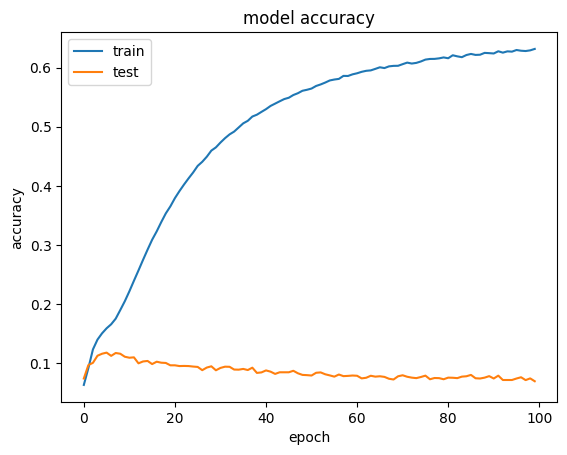

In [20]:
plt.plot(history3['accuracy'])
plt.plot(history3['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [ ]:
### Plot Loss Vs Epochs for model 3

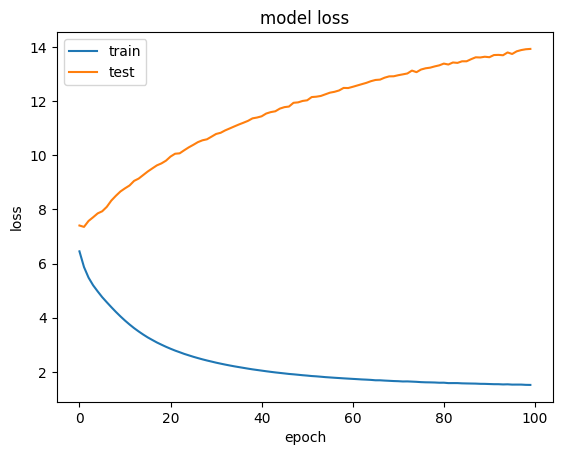

In [21]:
plt.plot(history3['loss'])
plt.plot(history3['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Section 6:    Predict next set of words 


The code is explained below 


**Initial set up**

- `seed_text:` This is the initial starting text (or prompt) from which the model will generate more text. In this case, it starts with "I will close the door if".

- `next_words = 5:` The variable next_words defines how many words the model will generate after the seed text. In this case, it will generate 7 new words.


**For Loop for Word Prediction:**

- A for loop is initiated to run next_words times (5 iterations). In each iteration, the model will predict one word and append it to seed_text.

**Convert Seed Text to Tokens:**

- `tokenizer.texts_to_sequences([seed_text]):` This function converts the seed_text into a sequence of integers (tokens) based on a previously fitted tokenizer.

- For example, if the tokenizer maps the word "I" to 1, "will" to 5, "close" to 9, etc., then the sentence "I will close the door if" might be converted to something like [1, 5, 9, 12, 3, 7].


- `[0]: The texts_to_sequences` method returns a list of lists, but since we are passing only one sentence, we access the first element using [0] to get the actual list of token IDs.


**Pad the Sequence:**

- `pad_sequences:` This function ensures that the input sequence has the same length as the expected input shape of the model. Padding is done at the beginning of the sequence (padding='pre') to match the required length.


- `max_sequence_len-1:` The length of the padded sequence is set to one less than the max_sequence_len, which is likely the length used during training. This is necessary because the model is trained to predict the next word based on a sequence of length `max_sequence_len-1` .


- The padding ensures that if the token_list is shorter than `max_sequence_len-1`, zeros are added at the start.

**Model Prediction:**

- `model.predict(token_list):` The padded token sequence is fed into the model, and the model predicts the next word.

- The output of model.predict will likely be a probability distribution over all possible words in the vocabulary.


- `np.argmax(..., axis=-1):` This extracts the index (token) of the word with the highest predicted probability. This index corresponds to the word that the model thinks is the most likely next word.


**Find the Corresponding Word**

- This loop iterates through the tokenizer's word_index dictionary, which contains the mapping of words to their corresponding token indices.

- `if index == predicted`: This checks if the token index from the word_index matches the predicted token (the one the model predicted).

- `output_word = word:` If a match is found, the corresponding word is stored in output_word.
This step essentially translates the predicted token back into a human-readable word.



**Update Seed Text:**

- The predicted word (output_word) is appended to the original seed_text. This updated seed_text now becomes the input for the next iteration of the loop.

- After each iteration, the model will generate the next word based on the newly updated seed_text, and this process continues for next_words iterations.

In [28]:
# Determine a text
seed_text = "I will come"
# Predict word number
next_words = 5

for _ in range(next_words):
    # Convert seed_text to token
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad sequences to match input shape
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Model prediction
    predicted = np.argmax(loaded_model3.predict(token_list), axis=-1)
    output_word = ""
    # Get the predicted word from the tokenizer's word_index
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    # Append the predicted word to the seed text
    seed_text += " " + output_word


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [29]:
print(seed_text)

I will come to the house that i


### End of notebook